In [2]:
%matplotlib notebook
import numpy as np
import math
import numdifftools as nd
import matplotlib.pyplot as plt
import torch
from torch.autograd.functional import hessian
from matplotlib.animation import FuncAnimation

In [3]:
def func(x):
    return x[0]**2 + 2*x[1]**2 + (math.e)**(x[0] + x[1])

In [4]:
class SGD:
    
    def __init__(self, func, n = 2, eps = 0.0001, initP = (1, 1)):
        
        self.n = n          # Размерность
        self.eps = eps      # Точность поиска
        self.func = func    # Оптимизируемая функция
        self.counter = 0    # Счетчик итераций
        
        self.point = np.array(initP, dtype='float64') # Текущая точка
        
        self.pointHist = [list(self.point).copy()]    # Найденные точки
        self.funcHist = [self.func(self.point)]       # Функция в найденных точках
        
        
    def execute(self):
        
        while True:
            
            # Вычисление градиента
            grad = nd.Gradient(self.func)(self.point)
            
            # Проверка условия окончания поиска
            if np.linalg.norm(grad) <= eps:
                
                break
                
            else:
                
                # Определение координат новой точки
                hess = hessian(self.func, torch.from_numpy(self.point))
                self.point -= (np.dot(grad, grad)/np.dot(np.dot(hess, grad), grad))*grad
                
                # Сохранение найденных значений и увелечение счетчика
                self.pointHist.append(list(self.point).copy())
                self.funcHist.append(self.func(self.point))
                self.counter += 1
                

In [5]:
fun = func
n = 2
eps = 0.0001
initP = (-4, 4)

sgd = SGD(fun, n, eps, initP)
sgd.execute()

In [6]:
hP = sgd.pointHist
hF = sgd.funcHist
fhP = [hP[0:i+1] for i in range(len(hP))]

print(f'\n\nНайденная точка минимума: {tuple(hP[-1])}\n')
print(f'Найденный минимум: {hF[-1]}\n')
print(f'Количество итераций: {sgd.counter}\n\n')
print(f'Таблица найденных точек:\n')
print('{0:>10}  {1:>10}  {2:>15}\n'.format('x1', 'x2', 'func(x1, x2)'))
for i, p in enumerate(hP):
    print('{0:10.5f}  {1:10.5f}  {2:15.5f}'.format(p[0], p[1], hF[i]))



Найденная точка минимума: (-0.31279485793841166, -0.15638206318203818)

Найденный минимум: 0.7722682287370004

Количество итераций: 8


Таблица найденных точек:

        x1          x2     func(x1, x2)

  -4.00000     4.00000         49.00000
  -2.25258    -0.24372          5.27533
  -0.23544     0.16333          1.03921
  -0.32259    -0.13701          0.77314
  -0.31947    -0.15608          0.77233
  -0.31340    -0.15511          0.77227
  -0.31320    -0.15636          0.77227
  -0.31281    -0.15630          0.77227
  -0.31279    -0.15638          0.77227


<IPython.core.display.Javascript object>


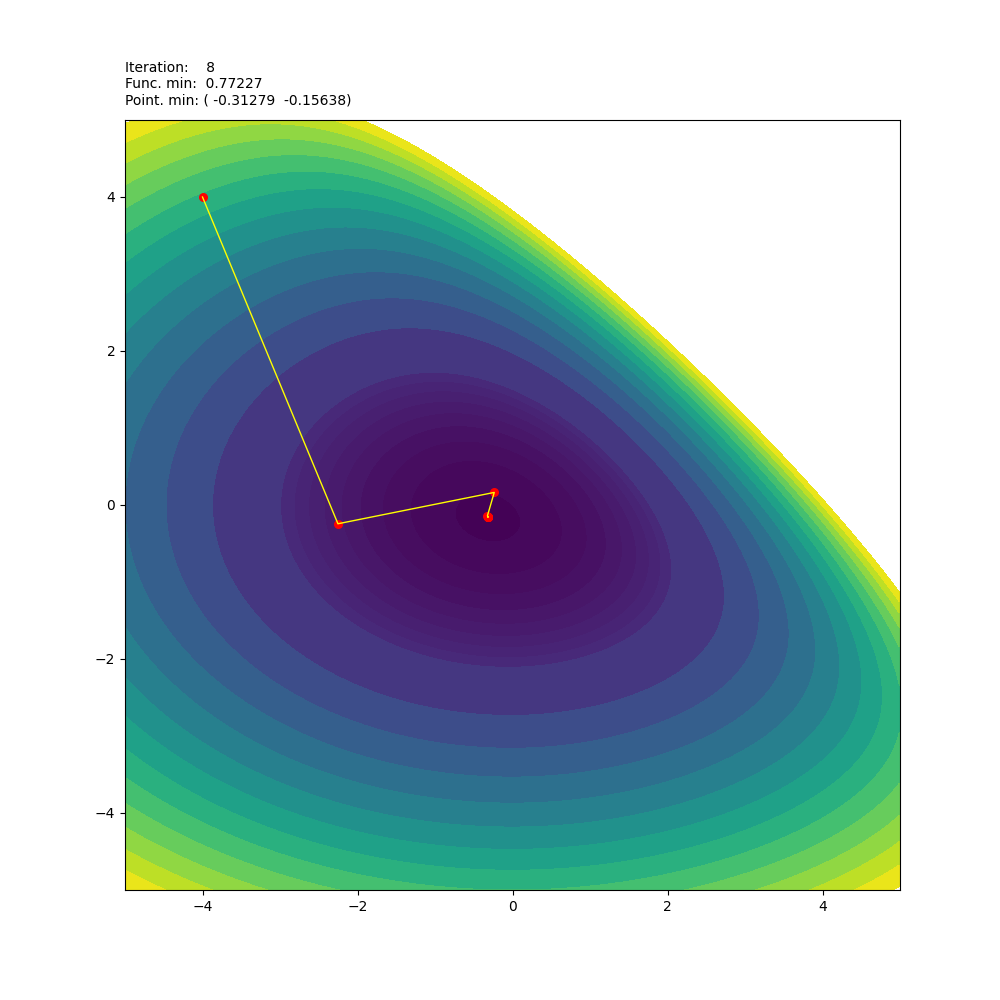

In [7]:
delta = 0.01
x = np.arange(-5, 5, delta)
y = np.arange(-5, 5, delta)
X, Y = np.meshgrid(x, y)
Z = func((X, Y))

figA = plt.figure(figsize=(10, 10))
axA = figA.add_subplot()

plt.xlim(-5, 5)
plt.ylim(-5, 5)

axA.contourf(X, Y, Z, np.concatenate((np.arange(0, 10, 1), np.arange(15, 80, 5))))


scat = axA.scatter([], [], s=30, c='red')
line, = axA.plot([], color='yellow', linewidth=1)
temp = axA.text(-5, 5.2, '')
    
def animate(i):
    temp.set_text('Iteration: {0:4d}\nFunc. min: {1:8.5f}\nPoint. min: ({2:9.5f} {3:9.5f})'.format(i, hF[i], hP[i][0], hP[i][1]))
    scat.set_offsets(fhP[i])
    t = np.array(fhP[i])
    x, y = t[:,0], t[:,-1]
    line.set_data((x, y))
    
anim1 = FuncAnimation(figA, animate, frames=len(hP), interval=1000, repeat=False)